# Real Estate Price Analysis — Exploratory Data Analysis (EDA)

This project performs Exploratory Data Analysis on a real estate housing dataset
to understand the factors affecting house prices and identify important patterns
in property valuation.

## Objective

The main objective of this project is:

• To analyze pricing patterns of houses  
• To understand how amenities and features impact Sale Price  
• To perform data cleaning and visualization  
• To prepare the dataset for future machine learning modeling

## About the Dataset

The dataset contains information about residential houses including:

• Area and size details
• Quality and condition ratings
• Garage, basement, rooms and bathrooms
• Year built and renovation details
• Location and neighborhood
• Final Sale Price of the property

## Libraries Used

This project uses the following Python libraries:

• Pandas – Data manipulation
• NumPy – Numerical operations
• Matplotlib & Seaborn – Data visualization



In [33]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Loading the dataset
df = pd.read_csv('C:/Users/windows/OneDrive/Desktop/nexthikes/housing_data.csv')
df.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


## Dataset Overview

Checking the shape, columns, and data types of the dataset.

In [77]:
df.shape
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   int64  
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

# Data Cleaning
Handling missing values, removing unnecessary columns, and treating outliers.


In [65]:
# Dropping unnecessary column
df.drop(columns=['Unnamed: 0'], inplace=True)
# Checking missing values
df.isnull().sum().sort_values(ascending=False)

Alley           1369
MasVnrType       872
GarageYrBlt       81
Electrical         1
KitchenAbvGr       0
                ... 
ExterCond          0
ExterQual          0
MasVnrArea         0
Exterior2nd        0
SalePrice          0
Length: 80, dtype: int64

## Handling Missing Values

In this step, missing values are handled using suitable methods.
Categorical features are filled with 'None' where absence of feature is meaningful,
and numerical features are filled with median values.


In [24]:
# List of categorical columns where NaN means feature is not present
cols_fill_none = ['Alley','PoolQC','Fence','MiscFeature','FireplaceQu',
                  'GarageType','GarageFinish','GarageQual','GarageCond',
                  'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                  'MasVnrType']

# Filling these columns with 'None' because missing value means absence of that feature
for col in cols_fill_none:
    df[col] = df[col].fillna('None')

# Selecting all numerical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns

# Filling numerical missing values with median 
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


In [29]:
# Checking if any missing values are still present
df.isnull().sum().sum()

np.int64(0)

In [27]:
# Display top columns with missing values 
df.isnull().sum().sort_values(ascending=False).head(10)

Electrical      1
MSZoning        0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
dtype: int64

In [28]:
# Filling the remaining missing value in Electrical column using mode
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [30]:
# Checking again if any missing values are left in the dataset
df.isnull().sum().sum()

np.int64(0)

In [31]:
# Checking if there are any duplicate rows present in the dataset
df.duplicated().sum()

np.int64(0)

In [32]:
# Removing duplicate rows if any (here dataset had 0 duplicates)
df.drop_duplicates(inplace=True)

All missing values and duplicate entries have been handled successfully.
The dataset is now clean and ready for exploratory data analysis.

# Univariate Analysis

In this section, we analyze individual features to understand their distribution,
skewness, and presence of outliers. This helps in understanding the nature of data
before building any model.

## Target Variable Analysis – SalePrice
Understanding how the target variable (SalePrice) is distributed.
This helps to identify skewness and outliers in the data.



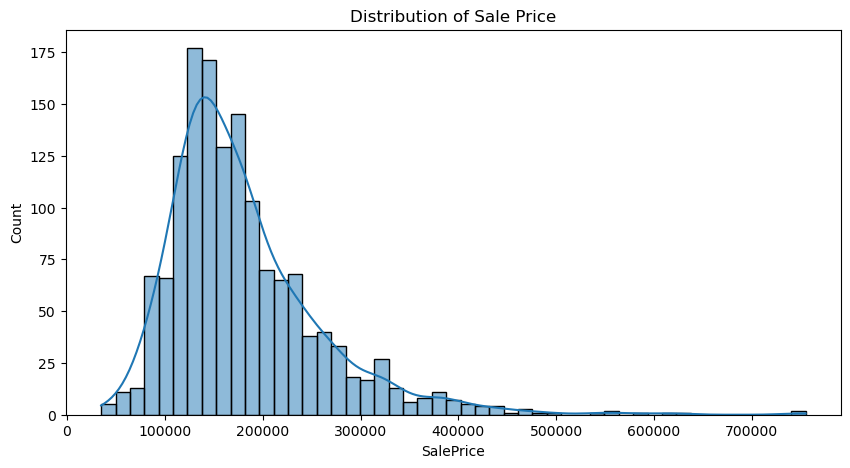

In [36]:
# Distribution of Sale Price
plt.figure(figsize=(10,5))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.show()

Observation:
The SalePrice distribution is right-skewed, which indicates the presence of
high-price outliers. Most houses are concentrated in the lower price range.

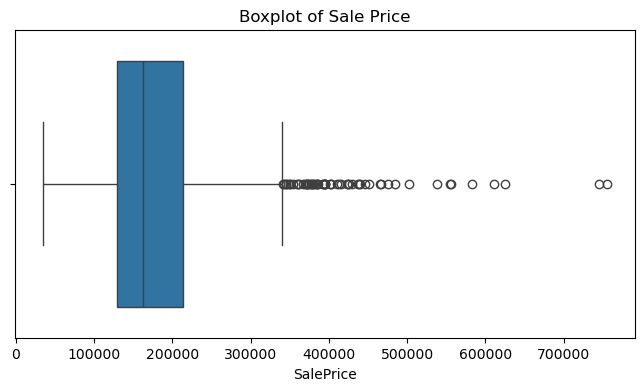

In [37]:
# Boxplot to check outliers in SalePrice
plt.figure(figsize=(8,4))
sns.boxplot(x=df['SalePrice'])
plt.title('Boxplot of Sale Price')
plt.show()

Observation:
The boxplot clearly shows many outliers on the higher end of SalePrice.Observation: The histogram shows that SalePrice is right-skewed.
Most houses are priced between 100000 and 250000.
Very few houses have extremely high prices which create the long tail.

# Bivariate Analysis

In this section, we analyze the relationship between individual features and SalePrice.


## Overall Quality vs SalePrice

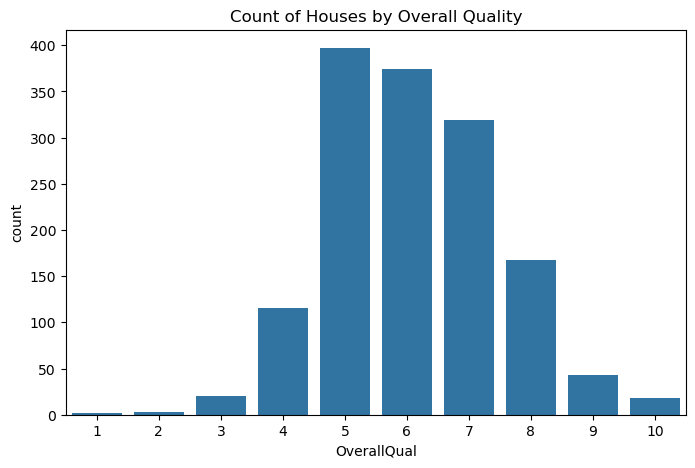

In [42]:
#Count of Houses by Overall Quality
plt.figure(figsize=(8,5))
sns.countplot(x=df['OverallQual'])
plt.title('Count of Houses by Overall Quality')
plt.show()


Observation: Most houses have OverallQual between 5 and 7.
Very few houses have very low or very high quality ratings.
This shows that majority of properties are of average to good quality.

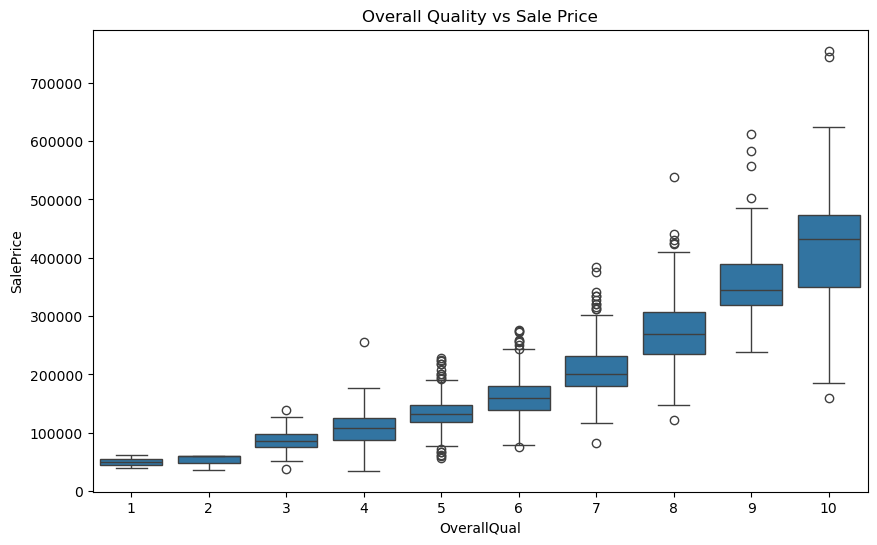

In [43]:
# Overall Quality vs Sale Price
plt.figure(figsize=(10,6))
sns.boxplot(x=df['OverallQual'], y=df['SalePrice'])
plt.title('Overall Quality vs Sale Price')
plt.show()

Observation: SalePrice increases clearly as OverallQual increases.
Houses with higher quality ratings have significantly higher prices.
This shows a strong relationship between OverallQual and SalePrice.


Insight: OverallQual is one of the most important factors affecting house prices.

## Ground Living Area vs Saleprice

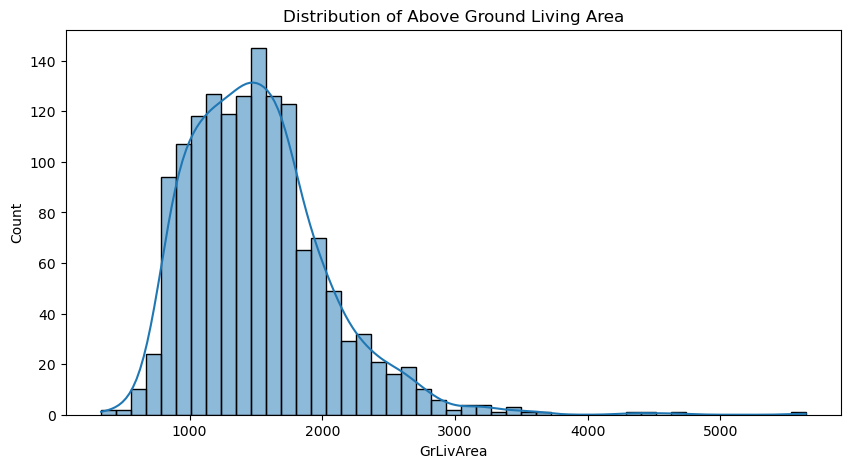

In [38]:
# Distribution of Above Ground Living Area
plt.figure(figsize=(10,5))
sns.histplot(df['GrLivArea'], kde=True)
plt.title('Distribution of Above Ground Living Area')
plt.show()

Observation: GrLivArea is also right-skewed.
Most houses have living area between 1000 and 2000 sq ft.
Few houses have very large living area which can be treated as outliers.

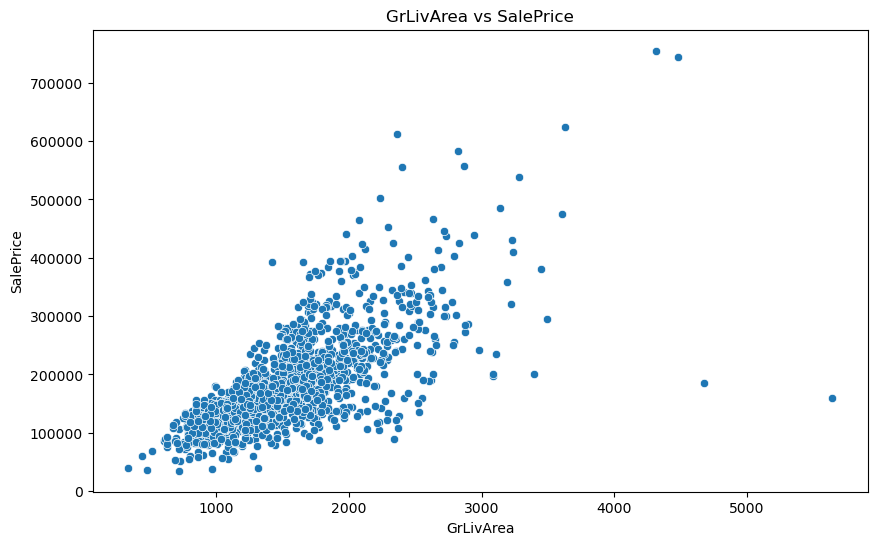

In [39]:
# GrLivArea vs SalePrice
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.title('GrLivArea vs SalePrice')
plt.show()


Observation: There is a strong positive relationship between GrLivArea and SalePrice.
As living area increases, sale price also increases.
Some outliers are visible in the graph.

## Total Basement Area vs SalePrice

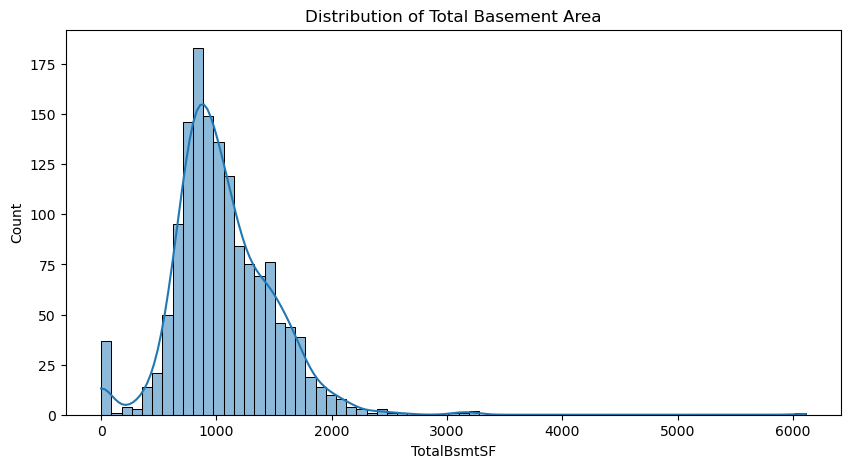

In [69]:
#Distribution of Total Basement Area
plt.figure(figsize=(10,5))
sns.histplot(df['TotalBsmtSF'], kde=True)
plt.title('Distribution of Total Basement Area')
plt.show()


Observation: The basement area is right-skewed.
Most houses have basement area between 500 and 1500 sq ft.
Few houses have very large basements.


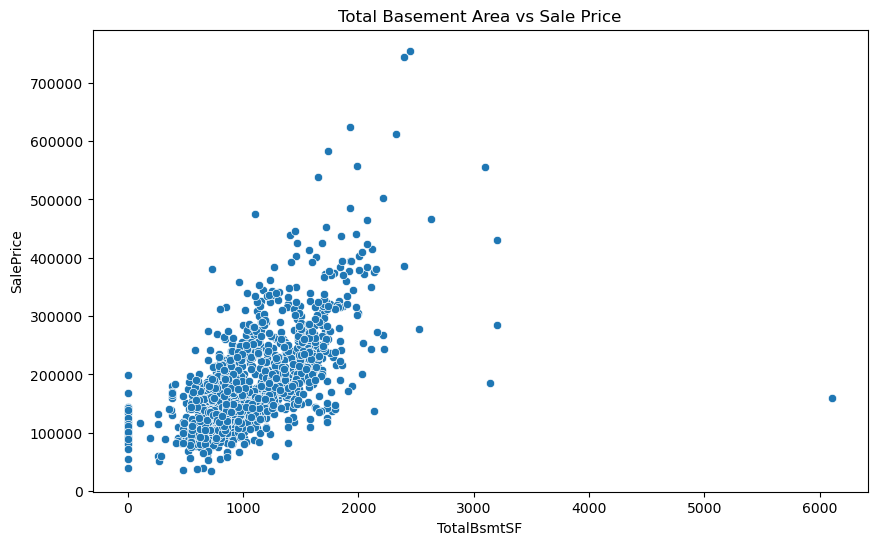

In [70]:
#Total Basement Area vs Sale Price
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['TotalBsmtSF'], y=df['SalePrice'])
plt.title('Total Basement Area vs Sale Price')
plt.show()


Observation: There is a positive relationship between TotalBsmtSF and SalePrice.
Houses with larger basement area tend to have higher prices.
Some outliers are visible in the graph.

Insight: Basement area contributes positively to house valuation.


## Neighborhood vs SalePrice


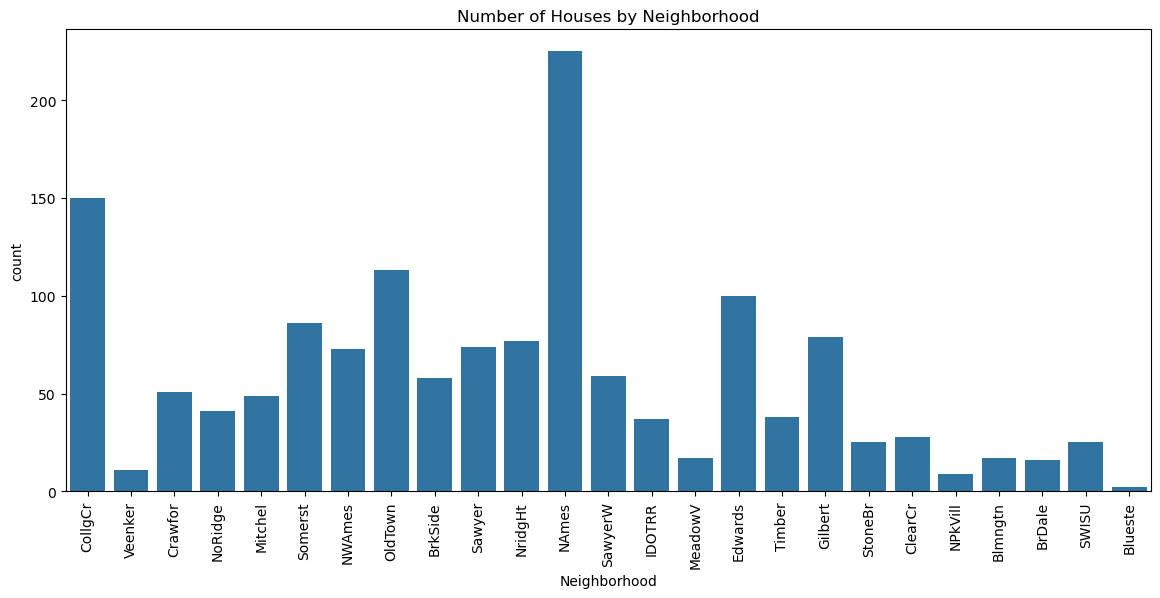

In [71]:
# Number of Houses by Neighborhood
plt.figure(figsize=(14,6))
sns.countplot(x=df['Neighborhood'])
plt.xticks(rotation=90)
plt.title('Number of Houses by Neighborhood')
plt.show()


Observation: The number of houses varies across neighborhoods.
Some neighborhoods have many houses while some have very few.

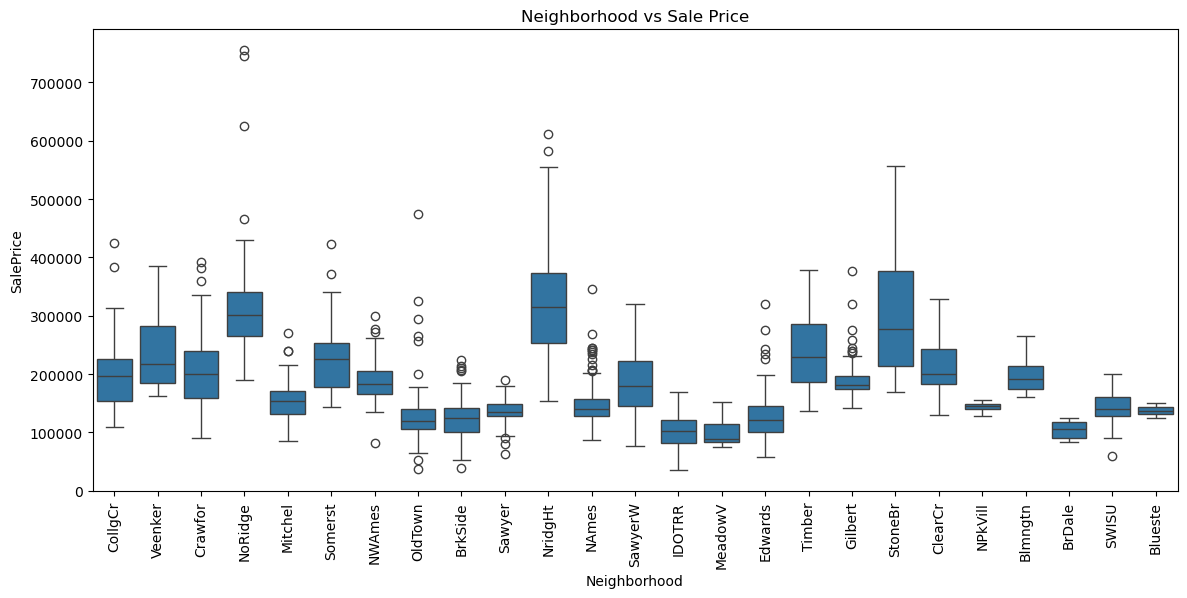

In [47]:
# Neighborhood vs Sale Price
plt.figure(figsize=(14,6))
sns.boxplot(x=df['Neighborhood'], y=df['SalePrice'])
plt.xticks(rotation=90)
plt.title('Neighborhood vs Sale Price')
plt.show()


Observation: SalePrice differs significantly across neighborhoods.
Some neighborhoods have consistently higher property prices than others.

Insight: Neighborhood plays a major role in determining house prices.

# Multivariate Analysis

In this section, we analyze the relationship between multiple numerical features
and SalePrice using correlation matrix.


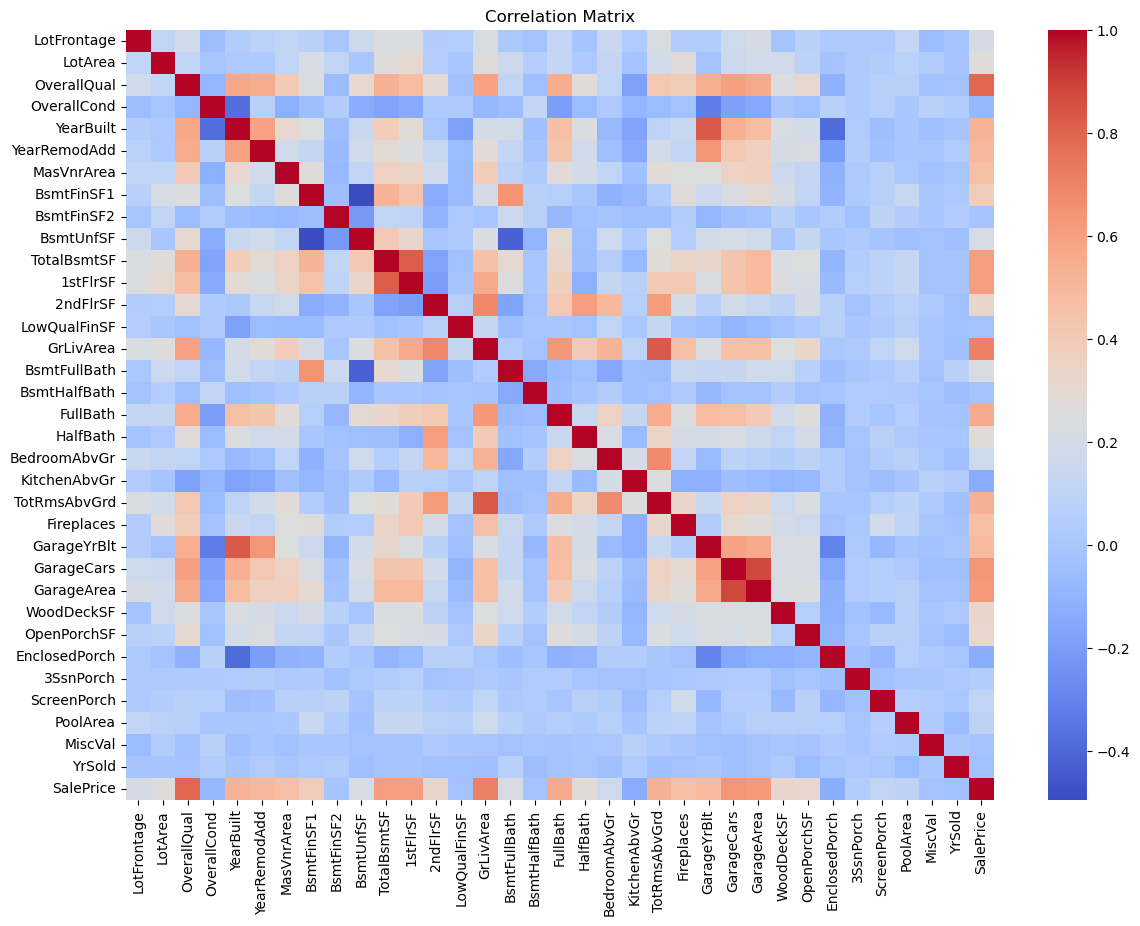

In [73]:
#Correlation Matrix
corr = df.corr(numeric_only=True)
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Observation: The heatmap shows the correlation between numerical features and SalePrice.
OverallQual, GrLivArea, GarageCars, GarageArea and TotalBsmtSF
show strong positive correlation with SalePrice.

Insight: These highly correlated features are important for house price prediction.


## Important Features Based on Correlation

From the correlation values, we identify the top features that
strongly affect SalePrice.


In [49]:
sale_corr = corr['SalePrice'].sort_values(ascending=False)
sale_corr.head(15)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
GarageYrBlt     0.466754
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

Observation: OverallQual, GrLivArea, GarageCars, GarageArea and TotalBsmtSF
show strong positive correlation with SalePrice.

These features are most important for house price prediction.


## Creating Price Per Square Foot Feature


In [50]:
df['PricePerSqFt'] = df['SalePrice'] / df['GrLivArea']
df[['SalePrice','GrLivArea','PricePerSqFt']].head()


,SalePrice,GrLivArea,PricePerSqFt
0,208500,1710,121.929825
1,181500,1262,143.819334
2,223500,1786,125.139978
3,140000,1717,81.537566
4,250000,2198,113.739763


Observation: A new feature PricePerSqft is created by dividing SalePrice by GrLivArea.
This helps to understand how price varies with respect to area.


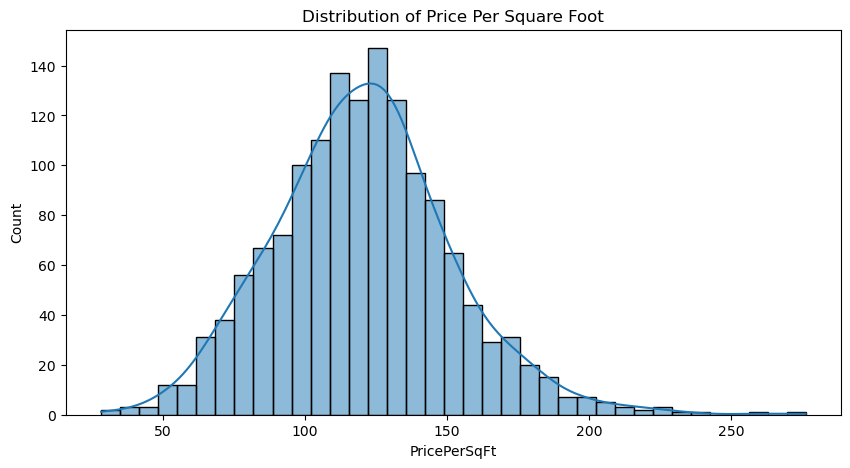

In [51]:
# Distribution of Price Per Square Foot
plt.figure(figsize=(10,5))
sns.histplot(df['PricePerSqFt'], kde=True)
plt.title('Distribution of Price Per Square Foot')
plt.show()

Observation: Price per square foot varies across houses.
Few houses have very high price per sqft which may belong to premium locations.

## Creating Property Age Feature


In [52]:
df['PropertyAge'] = df['YrSold'] - df['YearBuilt']
df[['YearBuilt','YrSold','PropertyAge']].head()


,YearBuilt,YrSold,PropertyAge
0,2003,2008,5
1,1976,2007,31
2,2001,2008,7
3,1915,2006,91
4,2000,2008,8


Observation: PropertyAge shows how old the house was at the time of sale.


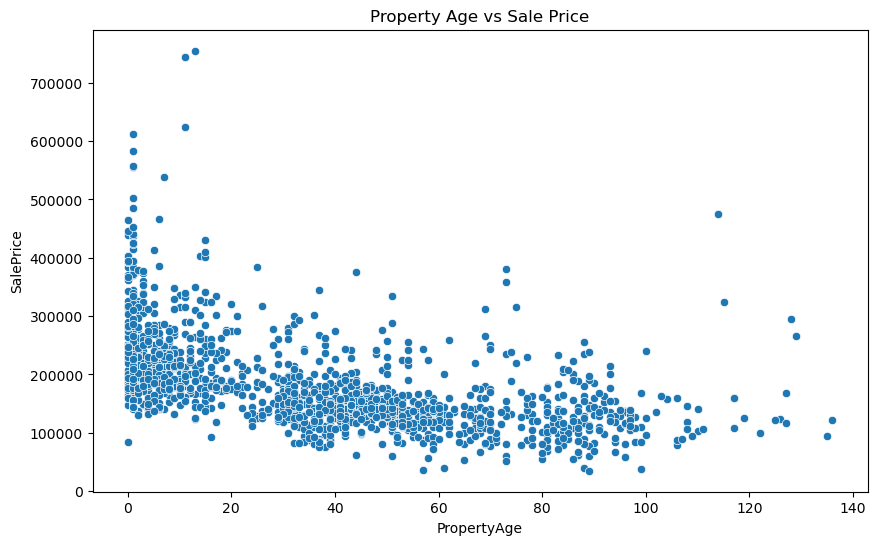

In [53]:
# Property Age vs SalePrice
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['PropertyAge'], y=df['SalePrice'])
plt.title('Property Age vs Sale Price')
plt.show()


Observation: As property age increases, SalePrice generally decreases.
Newer houses tend to have higher prices.

Insight: Feature engineering helps in better understanding of pricing patterns
and improves the quality of analysis.



## Bedrooms, Bathrooms and Total Rooms vs SalePrice


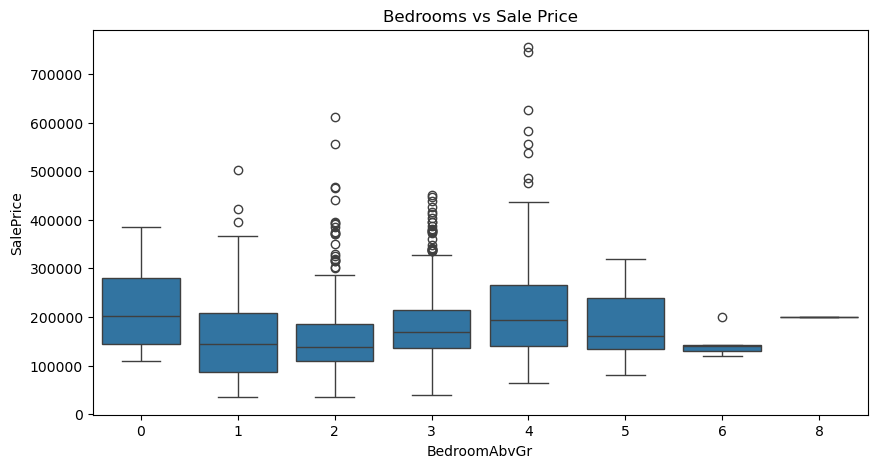

In [54]:
# Bedrooms vs SalePrice
plt.figure(figsize=(10,5))
sns.boxplot(x=df['BedroomAbvGr'], y=df['SalePrice'])
plt.title('Bedrooms vs Sale Price')
plt.show()


Observation: Houses with 3 to 4 bedrooms generally have higher sale prices.
Very high number of bedrooms does not always increase price.


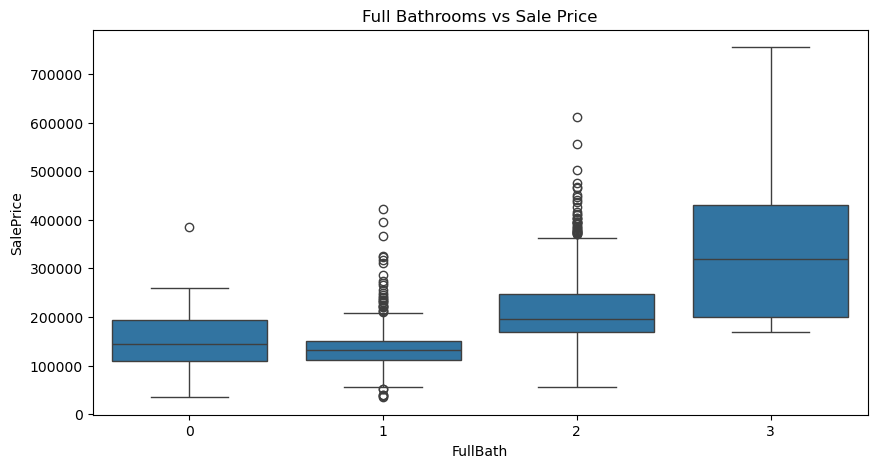

In [55]:
# Full Bathrooms vs SalePrice
plt.figure(figsize=(10,5))
sns.boxplot(x=df['FullBath'], y=df['SalePrice'])
plt.title('Full Bathrooms vs Sale Price')
plt.show()

Observation: As the number of full bathrooms increases, SalePrice also increases.
Bathrooms are an important factor in house valuation.

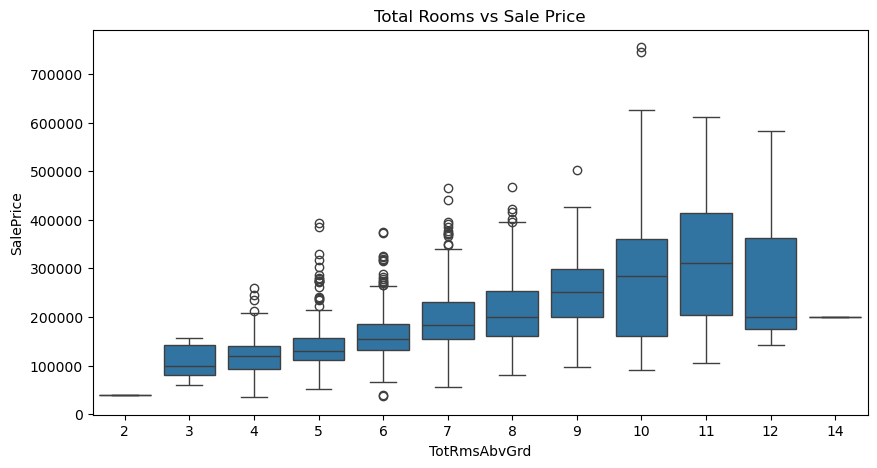

In [56]:
#Total Rooms vs SalePrice
plt.figure(figsize=(10,5))
sns.boxplot(x=df['TotRmsAbvGrd'], y=df['SalePrice'])
plt.title('Total Rooms vs Sale Price')
plt.show()


Observation: Houses with more total rooms tend to have higher prices.
However, after a certain number, the price increase is not very significant.

Insight: Bedrooms, bathrooms and total rooms have positive impact on SalePrice.


## Market Trend Analysis (Year and Month Sold)


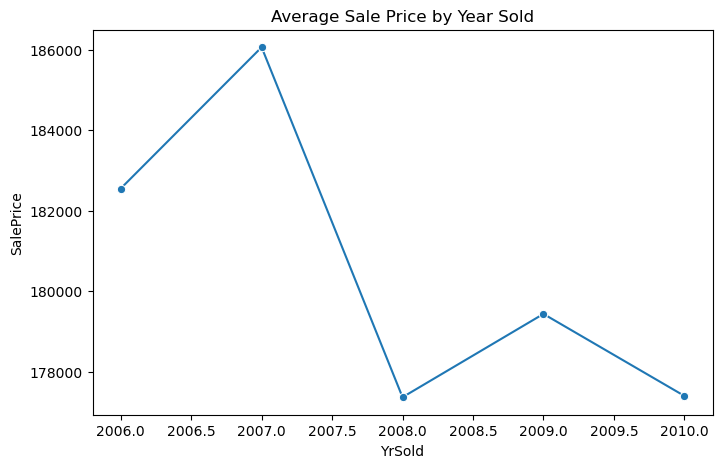

In [57]:
# Average Sale Price by Year Sold
year_trend = df.groupby('YrSold')['SalePrice'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(x='YrSold', y='SalePrice', data=year_trend, marker='o')
plt.title('Average Sale Price by Year Sold')
plt.show()


Observation: Average SalePrice shows slight variation across years.
There is a small dip around 2008 which may indicate market fluctuation.

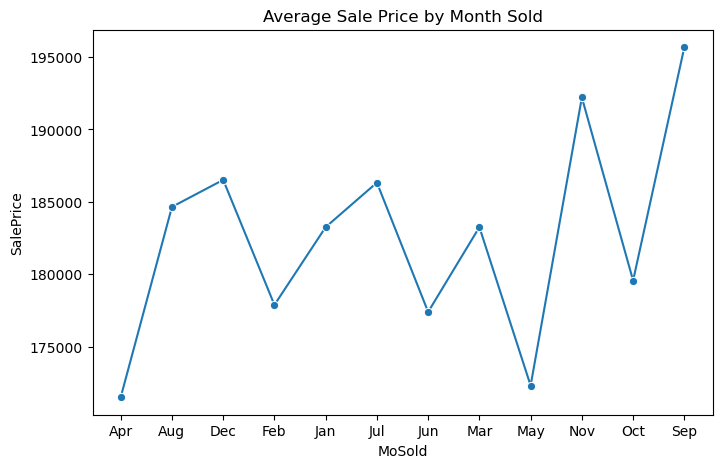

In [76]:
#Average Sale Price by Month Sold
month_trend = df.groupby('MoSold')['SalePrice'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(x='MoSold', y='SalePrice', data=month_trend, marker='o')
plt.title('Average Sale Price by Month Sold')
plt.show()


Observation: SalePrice varies across different months.
Some months show higher average prices, indicating seasonal trends in house sales.

Insight: Time of sale (year and month) has some influence on house prices.



## Impact of Amenities on SalePrice


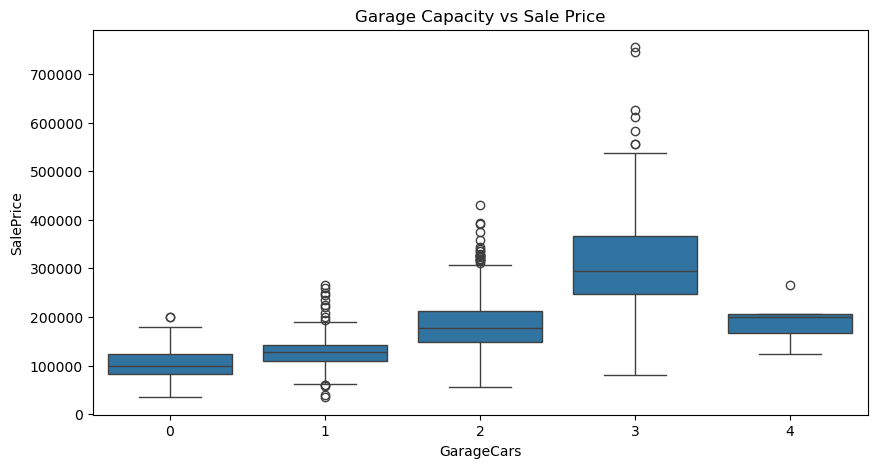

In [59]:
# Garage Capacity vs Sale Price
plt.figure(figsize=(10,5))
sns.boxplot(x=df['GarageCars'], y=df['SalePrice'])
plt.title('Garage Capacity vs Sale Price')
plt.show()


Observation: Houses with larger garage capacity have higher sale prices.
Garage space positively affects house valuation.


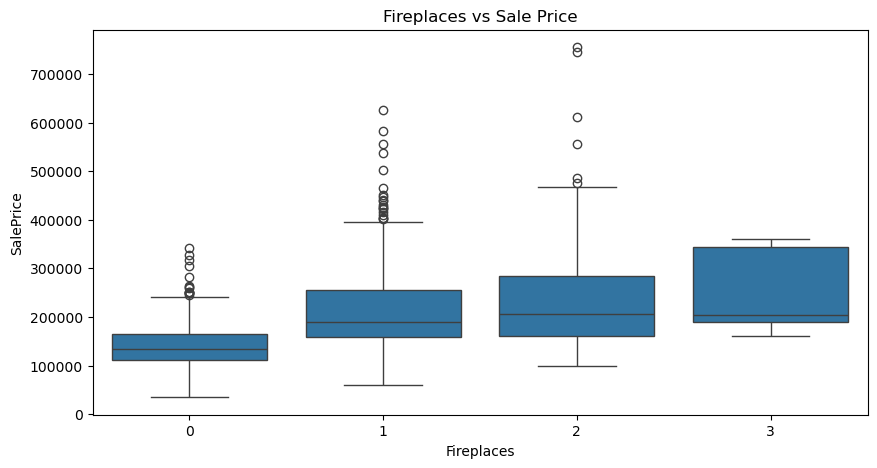

In [60]:
# Fireplaces vs Sale Price
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Fireplaces'], y=df['SalePrice'])
plt.title('Fireplaces vs Sale Price')
plt.show()


Observation: Houses with fireplaces tend to have higher prices.
More fireplaces slightly increase the property value.


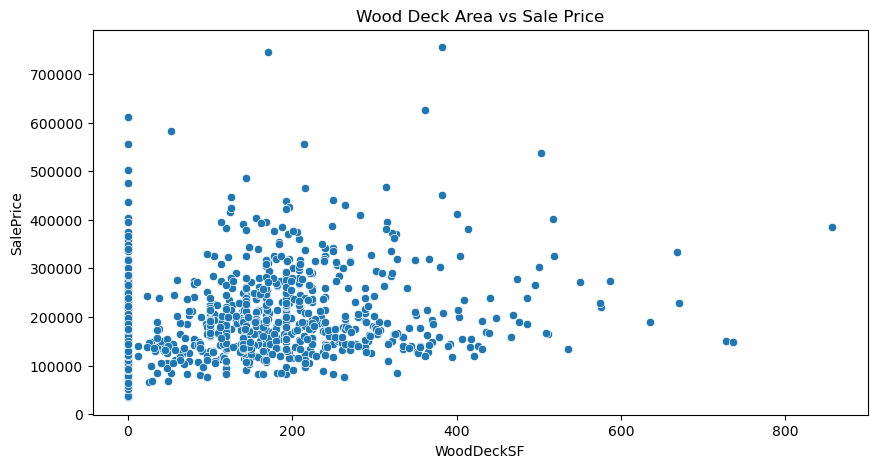

In [61]:
# Wood Deck Area vs Sale Price
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['WoodDeckSF'], y=df['SalePrice'])
plt.title('Wood Deck Area vs Sale Price')
plt.show()


Observation: Houses with larger wood deck area generally have higher prices,
but the relationship is not very strong.


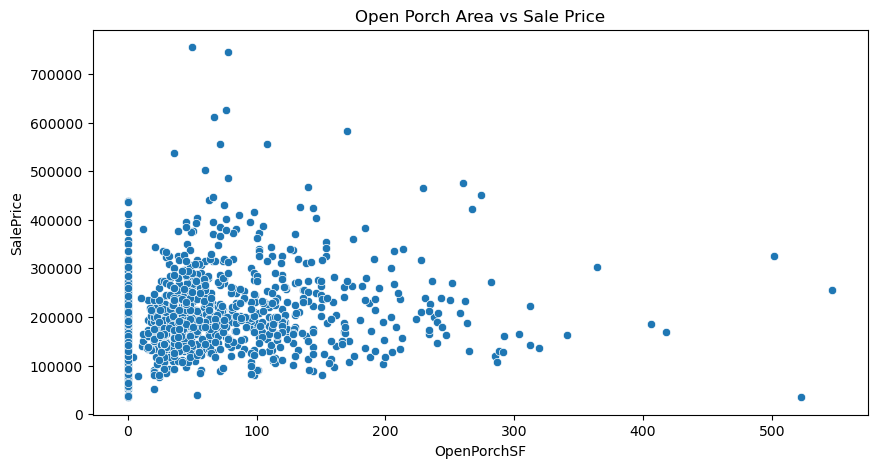

In [62]:
#Open Porch Area vs Sale Price
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['OpenPorchSF'], y=df['SalePrice'])
plt.title('Open Porch Area vs Sale Price')
plt.show()


Observation: Open porch area has a small positive impact on SalePrice.

Insight: Additional amenities like garage, fireplace, deck and porch
add extra value to the property.



# Final Conclusion and Business Insights

After performing complete Exploratory Data Analysis on the housing dataset,
we identified the key factors that influence house prices in the market.

• OverallQual is the most important factor affecting SalePrice.

• GrLivArea and TotalBsmtSF have strong positive relationship with price.

• Neighborhood plays a major role in determining property value.

• Garage capacity, bathrooms, rooms and other amenities increase house value.

• Newer houses generally have higher prices compared to older houses.

• Price per square foot varies across houses and reflects location value.

• Market trends show slight variation across years and months.



## Business Insights

This analysis can help real estate companies and buyers to understand
which features add more value to a property and how pricing patterns
work in the market.
